## Module 1: Introduction to Linear Regression Models

### Step 0

Load the appropriate libraries and bring in the data. Note that we have to run a script to get the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to match as it is in scikit-learn. We cannot pull it directly from scikit-learn since CodeGrade cannot access the internet.

In [2]:
# CodeGrade step0

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import tarfile
import joblib # Import joblib directly
from sklearn.datasets._base import _pkl_filepath, get_data_home

# Process to get the data to be as it is scikitlearn
archive_path = "cal_housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6) # Now using the directly imported joblib

# Load the dataset
california = fetch_california_housing(as_frame=True)
data = california.data
target = california.target

In [3]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [4]:
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
target.max()

5.00001

In [6]:
target.min()

0.14999

### Step 1

*   Create a copy of the data and call it `df`
*   Select the `X` variable to be `MedInc` and the `y` be `MedianHouseValue`

Return `X.shape, y.shape` to verify.



In [4]:
# CodeGrade step1
df = data.copy()

# Create a column of one value =  Median (It's not clear in the instruction but I guess that)
# df['MedianHouseValue'] = pd.Series([df['MedInc'].median()] * len(df))

X = df[['MedInc']]
y = target

In [5]:
X.shape

(20640, 1)

In [6]:
y.shape

(20640,)

### Step 0

In [7]:
# CodeGrade step0
from sklearn.linear_model import LinearRegression

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
model.intercept_

0.45085576703267916

In [9]:
model.coef_[0]

0.4179384920189627

### Step 2

Find `y_pred` by using the model to predict `y` given the argument of `X`.

Return `y_pred.shape` to verify.

In [10]:
# CodeGrade step2
# Generate predicted values for the regression line
y_pred = model.predict(X)
y_pred.shape

(20640,)

In [11]:
y_pred

array([3.9302773 , 3.92033036, 3.48400258, ..., 1.1613512 , 1.23123052,
       1.44914365])

In [12]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

Plot the scatterplot with the regression line

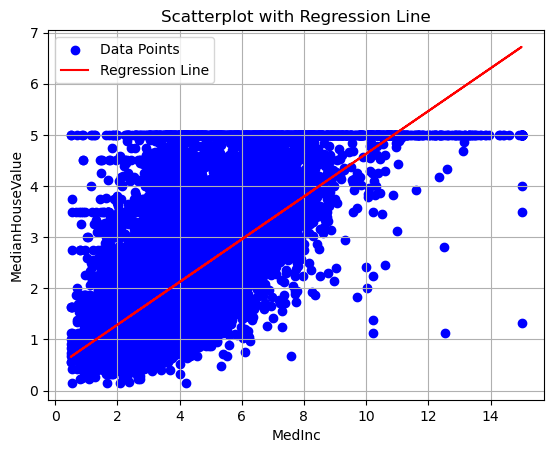

In [13]:
# Plot the scatterplot with the regression line
# Generate predicted values

# Plot scatterplot with regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Scatterplot with Regression Line')
plt.xlabel('MedInc')
plt.ylabel('MedianHouseValue')
plt.legend()
plt.grid(True)
plt.show()

### Step 3

Extract the `intercept` and `slope` of the model.

Return `intercept, slope` to verify.

In [14]:
# CodeGrade step3
model.coef_[0]

0.4179384920189627

In [15]:
model.intercept_

0.45085576703267916

### Step 4

Calculate the correlation coeficient using `pearsonr` and call this `r`.

Return only `r` not the array and round to two decimal places.

In [16]:
# CodeGrade step4
r, p_value = pearsonr(X['MedInc'], y)

In [17]:
r = round(r,2)
r

0.69